In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive 
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/ENV717')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Colab Notebooks/ENV717'

# Question 1
Extreme weather conditions this winter could cause outages on power plants and transmission lines across New England.  Use eGrid2021  data and data on peak electricity consumption to analyze the composition of ISO New England’s power generation assets and their adequacy.

### a.	Summarize the total power generation capacity by fuel and the total electricity generation in 2020. Present totals and percentages as shown in the table below.

In [2]:
#Read eGRID2021 excel file directly from the website
egrid_plnt21=pd.read_excel("https://www.epa.gov/system/files/documents/2023-01/eGRID2021_data.xlsx", 
                           sheet_name="PLNT21", keep_default_na=False, header=1)

# Convert numeric columns to numeric
egrid_plnt21.CAPFAC=pd.to_numeric(egrid_plnt21.CAPFAC)
egrid_plnt21.NAMEPCAP=pd.to_numeric(egrid_plnt21.NAMEPCAP)
egrid_plnt21.PLHTIAN=pd.to_numeric(egrid_plnt21.PLHTIAN)
egrid_plnt21.PLNGENAN=pd.to_numeric(egrid_plnt21.PLNGENAN)

egrid_plnt21.tail(n=10)

,SEQPLT,YEAR,PSTATABB,PNAME,ORISPL,OPRNAME,OPRCODE,UTLSRVNM,UTLSRVID,SECTOR,...,PLWIPR,PLSOPR,PLGTPR,PLOFPR,PLOPPR,PLTNPR,PLTRPR,PLTHPR,PLCYPR,PLCNPR
11383,11384,2021,WY,Strawberry Creek,6393,Lower Valley Energy Inc,11273,Lower Valley Energy Inc,11273,Electric Utility,...,0,0,0,0,0,0,1,0,0,1
11384,11385,2021,WY,Sweetwater Solar,61369,Oncor Electric Delivery Company LLC,44372,Sweetwater Solar LLC,61005,IPP Non-CHP,...,0,1,0,0,0,0,1,1,0,1
11385,11386,2021,WY,Swift Creek,6394,Lower Valley Energy Inc,11273,Lower Valley Energy Inc,11273,Electric Utility,...,0,0,0,0,0,0,1,0,0,1
11386,11387,2021,WY,TB Flats,62516,PacifiCorp,14354,PacifiCorp,14354,Electric Utility,...,1,0,0,0,0,0,1,1,0,1
11387,11388,2021,WY,Top of the World Windpower Project,57327,PacifiCorp,14354,Duke Energy Top Of the World WindPower,56682,IPP Non-CHP,...,1,0,0,0,0,0,1,1,0,1
11388,11389,2021,WY,TransAlta Wyoming Wind,56093,PacifiCorp,14354,NextEra Energy Operating Services LLC,58528,IPP Non-CHP,...,1,0,0,0,0,0,1,1,0,1
11389,11390,2021,WY,Wygen I,55479,Black Hills Power Inc,19545,"Black Hills Power, Inc.",19545,IPP Non-CHP,...,0,0,0,0,0,1,0,0,1,0
11390,11391,2021,WY,Wygen II,56319,Black Hills Power Inc,19545,"Black Hills Power, Inc.",19545,Electric Utility,...,0,0,0,0,0,1,0,0,1,0
11391,11392,2021,WY,Wygen III,56596,Black Hills Power Inc,19545,"Black Hills Power, Inc.",19545,Electric Utility,...,0,0,0,0,0,1,0,0,1,0
11392,11393,2021,WY,Wyodak,6101,PacifiCorp,14354,PacifiCorp,14354,Electric Utility,...,0,0,0,0,0,1,0,0,1,0


In [3]:
# Columns needed:
# Plant name: PNAME (Column D)
# Balancing Authority Code: BACODE (Column L)
# Plant primary fuel category: PLFUELCT (Column Z)
# Plant capacity factor: CAPFAC (Column AB)
# Plant nameplate capacity: NAMEPCAP (Column AC)
# Plant annual heat input from combustion (MMBTU): PLHTIAN (Column AK)
# Plant annual net generation (MWh): PLNGENAN (Column AO)
# Fuel prices: from EIA

question_1 = egrid_plnt21.loc[:,['PNAME', 'BACODE', 'PLFUELCT', 'CAPFAC', 
                                 'NAMEPCAP', 'PLHTIAN', 'PLNGENAN', 'YEAR']].copy()

question_1 = question_1.loc[question_1.BACODE == 'ISNE']

question_1.head(10)

,PNAME,BACODE,PLFUELCT,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,YEAR
2297,Adams Solar,ISNE,SOLAR,0.15845,1.0,NaN,1388.00,2021
2298,"Advance Stores Company, Inc",ISNE,SOLAR,0.12968,1.0,NaN,1136.00,2021
2299,ALDI DC 2,ISNE,SOLAR,0.13917,1.2,NaN,1463.00,2021
2300,Alfred L Pierce Generating Station,ISNE,GAS,0.00694,84.0,58953.109,5104.00,2021
2301,"Algonquin Power Windsor Locks, LLC",ISNE,GAS,0.21664,71.0,149209.734,134738.82,2021
2302,Amazon BDL3 Solar Project,ISNE,SOLAR,0.00046,1.0,NaN,4.00,2021
2303,Antares-GRE 314 East Lyme LLC,ISNE,SOLAR,0.17286,4.0,NaN,6057.00,2021
2304,Backus Microgrid Project,ISNE,OIL,0.01045,10.4,9591.000,952.00,2021
2305,Barrett Farm Solar - Phase I,ISNE,SOLAR,0.17741,1.7,NaN,2642.00,2021
2306,Barrow Solar,ISNE,SOLAR,0.09189,2.0,NaN,1610.00,2021


In [4]:
#Create pivot table where the sum of nameplate capacity, generation and stuff (tambahan adli)
pivot1 = pd.pivot_table(question_1, values=['NAMEPCAP', 'PLNGENAN'], 
               index=['PLFUELCT'],
                    aggfunc={np.sum})

isone_namepcap_sum = np.sum(question_1['NAMEPCAP'])
isone_plngenan_sum = np.sum(question_1['PLNGENAN'])

pivot1['% capacity in ISONE'] = pivot1['NAMEPCAP']/isone_namepcap_sum*100
pivot1['% generation in ISONE'] = pivot1['PLNGENAN']/isone_plngenan_sum*100

pivot1

,NAMEPCAP,PLNGENAN,% capacity in ISONE,% generation in ISONE
,sum,sum,,
PLFUELCT,,,,
BIOMASS,1405.4,6.940133e+06,3.539088,6.769929
COAL,496.4,2.855530e+05,1.250038,0.278550
GAS,22289.7,5.614925e+07,56.130070,54.772208
HYDRO,3837.1,5.790573e+06,9.662611,5.648562
NUCLEAR,3404.9,2.707263e+07,8.574242,26.408681
OIL,4483.8,1.580246e+05,11.291135,0.154149
OTHF,42.5,-8.440000e+02,0.107024,-0.000823
SOLAR,2228.0,2.456018e+06,5.610564,2.395785


### b. Build an electric power supply curve using baseload power plants that have a capacity factor above 1% and a nameplate capacity above 1MW. Assume a competitive wholesale electricity market and make any necessary assumptions for fuel prices. Respond: what is the highest demand the system can serve with these resources?

In [5]:
question_1b = question_1.copy()

#Plant primary fuel category for baseload
question_1b = question_1b.loc[(question_1b.PLFUELCT == 'COAL') | 
                              (question_1b.PLFUELCT == 'GAS') | 
                              (question_1b.PLFUELCT == 'HYDRO') | 
                              (question_1b.PLFUELCT == 'NUCLEAR') |
                              (question_1b.PLFUELCT == 'BIOMASS') |
                              (question_1b.PLFUELCT == 'OIL')]

#Plant capacity factor above 1%.
question_1b = question_1b.loc[question_1b.CAPFAC > 0.01]

#Plant nameplate capacity (MW) above 10 MW
question_1b = question_1b.loc[question_1b.NAMEPCAP > 10]

question_1b

#Baseload power: everything except wind, solar, and othf

#Estimate the marginal costs of each plant
#1. Calculate HEAT RATE
#  HEAT RATE (MMBTU/MWH) = ANNUAL HEAT INPUT (MMBTU)/ANNUAL GENERATION (MWH)
question_1b['HEAT_RATE'] = question_1b.PLHTIAN / question_1b.PLNGENAN

#2. Calculate marginal cost in $/MWh
#MARGINAL COST [$/MWH] = HEAT RATE (MMBTU/MWH) * COST OF FUEL [$/MMBTU]

# NG and Coal Prices from: 
# https://www.eia.gov/electricity/annual/html/epa_07_01.html
MARG_COST_NUCLEAR = 9 #$/MWh
AVG_PRICE_NG = 5.20 #$/MMBtu 
AVG_PRICE_COAL = 1.98 #$/MMBtu
AVG_PRICE_OIL = 10.88 #$/MMBtu
AVG_PRICE_BIOMASS = 3.46 #$/MMBtu
#Solar and wind price = 0

# Create new attribute to store the marginal cost
# Initially all the values are zero
question_1b['MARG_COST'] = 0
# Replace the marginal costs of nuclear plants by the given cost
question_1b.loc[question_1b.PLFUELCT=='NUCLEAR','MARG_COST'] = MARG_COST_NUCLEAR
# Replace the marginal costs of coal & NG plants by: heat rate * fuel cost
question_1b.loc[question_1b.PLFUELCT=='COAL','MARG_COST'] = question_1b.HEAT_RATE*AVG_PRICE_COAL
question_1b.loc[question_1b.PLFUELCT=='GAS','MARG_COST'] = question_1b.HEAT_RATE*AVG_PRICE_NG
question_1b.loc[question_1b.PLFUELCT=='OIL','MARG_COST'] = question_1b.HEAT_RATE*AVG_PRICE_OIL
question_1b.loc[question_1b.PLFUELCT=='BIOMASS','MARG_COST'] = question_1b.HEAT_RATE*AVG_PRICE_BIOMASS

#Show the first 5 values
question_1b.head(n=5)

,PNAME,BACODE,PLFUELCT,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,YEAR,HEAT_RATE,MARG_COST
2301,"Algonquin Power Windsor Locks, LLC",ISNE,GAS,0.21664,71.0,1.492097e+05,134738.82,2021,1.107400,5.758479
2304,Backus Microgrid Project,ISNE,OIL,0.01045,10.4,9.591000e+03,952.00,2021,10.074580,109.611429
2313,Bridgeport Energy,ISNE,GAS,0.50379,520.0,1.593573e+07,2294863.00,2021,6.944087,36.109251
2314,"Bridgeport Fuel Cell, LLC",ISNE,GAS,0.70677,16.6,NaN,102775.00,2021,NaN,NaN
2315,Bridgeport Harbor Station,ISNE,GAS,0.44974,994.9,2.674434e+07,3919622.00,2021,6.823194,35.480610


In [6]:
#Build a Supply Curve of Electricity
#1. Sort plants by merit order. This is from the cheapest to the most expensive
question_1b.sort_values("MARG_COST", inplace=True)
question_1b.head(n=5)

,PNAME,BACODE,PLFUELCT,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,YEAR,HEAT_RATE,MARG_COST
10950,Wilder,ISNE,HYDRO,0.39348,35.6,NaN,122710.000,2021,NaN,0.0
5009,Rumford Falls Hydro Facility,ISNE,HYDRO,0.53607,44.5,NaN,208970.999,2021,NaN,0.0
4992,Pejepscot Hydroelectric Project,ISNE,HYDRO,0.43529,13.5,NaN,51477.000,2021,NaN,0.0
4989,Otis Hydro,ISNE,HYDRO,0.45684,10.2,NaN,40820.000,2021,NaN,0.0
4962,Hydro Kennebec Project,ISNE,HYDRO,0.24122,15.4,NaN,32542.000,2021,NaN,0.0


In [9]:
# 2. Create a column with the cummulative capacity [MW] offered at that MARG_COST
# this info is needed to draw the supply curve
question_1b['CUM_CAP'] = question_1b.NAMEPCAP.cumsum(skipna=False)
question_1b.tail(n=5)
#The highest demand that can be served by the system with biomass, coal, gas, hydro, nuclear, and oil is 28620.7 MW.

,PNAME,BACODE,PLFUELCT,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,YEAR,HEAT_RATE,MARG_COST,CUM_CAP
4993,Penobscot Energy Recovery,ISNE,BIOMASS,0.20285,25.3,1121812.140,44958.0,2021,24.952448,86.335469,28158.2
2304,Backus Microgrid Project,ISNE,OIL,0.01045,10.4,9591.000,952.0,2021,10.074580,109.611429,28168.6
7298,Newington,ISNE,OIL,0.01614,414.0,784320.612,58527.0,2021,13.401005,145.802933,28582.6
2314,"Bridgeport Fuel Cell, LLC",ISNE,GAS,0.70677,16.6,NaN,102775.0,2021,NaN,NaN,28599.2
10922,Ryegate Associates,ISNE,BIOMASS,0.85775,21.5,NaN,161549.0,2021,NaN,NaN,28620.7


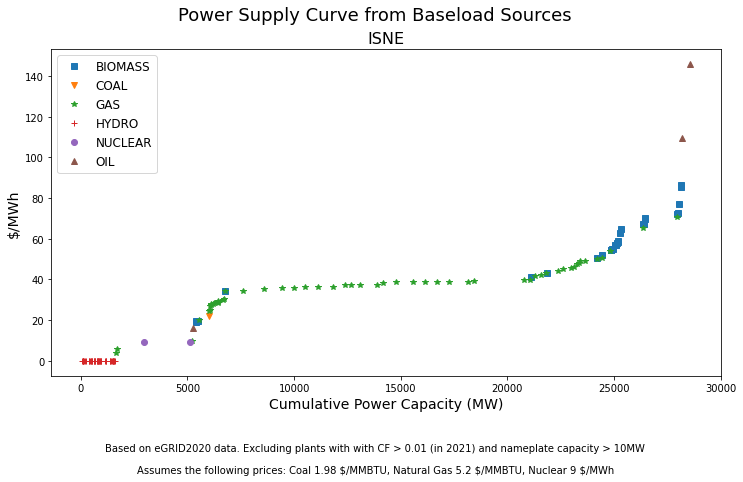

In [10]:
# 3. Create the supply curve using a scatter plot

# To distinguish the plants by type of fuel we will use different markers
groups = question_1b.groupby("PLFUELCT")
list_markers = ['s','v','*','+','o','^']

plt.figure(figsize=(12,6))

#loop to plot each group of plants by type of fuel(different colors and markers)
counter = 0
for name, group in groups:
  plt.plot(group["CUM_CAP"], group["MARG_COST"], marker=list_markers[counter], 
             linestyle="", label=name)
  counter = counter + 1

#Add titles and label axes
plt.suptitle('Power Supply Curve from Baseload Sources',
          fontsize=18)
plt.title('ISNE', fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW)", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)

#Make sure to add a caption that makes this plot a stand-alone piece of information
txt="Based on eGRID2020 data. Excluding plants with with CF > 0.01 (in 2021) and nameplate capacity > 10MW"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
txt2='Assumes the following prices: Coal {} $/MMBTU, Natural Gas {} $/MMBTU, Nuclear {} $/MWh'.format(AVG_PRICE_COAL, AVG_PRICE_NG, MARG_COST_NUCLEAR,)
plt.figtext(0.5, -0.1, txt2, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

### c.	Repeat b. adding solar and wind power generation resources. Of course, solar and wind resources cannot be counted at full nameplate capacity. Assume that wind and solar resources capacity is equal to their nameplate capacity, de-rated by their average 2020 capacity factor. Respond: what is the highest demand the system can serve with these resources? How much more compared to b.?

In [11]:
question_1c = question_1.copy()

#Plant primary fuel category for baseload
question_1c = question_1c.loc[(question_1c.PLFUELCT == 'COAL') | 
                              (question_1c.PLFUELCT == 'GAS') | 
                              (question_1c.PLFUELCT == 'HYDRO') | 
                              (question_1c.PLFUELCT == 'NUCLEAR') |
                              (question_1c.PLFUELCT == 'BIOMASS') |
                              (question_1c.PLFUELCT == 'OIL') |
                              (question_1c.PLFUELCT == 'SOLAR') |
                              (question_1c.PLFUELCT == 'WIND')]

#Plant capacity factor above 1%.
question_1c = question_1c.loc[question_1c.CAPFAC > 0.01]

#Plant nameplate capacity (MW) above 10 MW
question_1c = question_1c.loc[question_1c.NAMEPCAP > 10]

question_1c.loc[question_1c.PLFUELCT=='SOLAR','NAMEPCAP'] = question_1c.NAMEPCAP*question_1c.CAPFAC
question_1c.loc[question_1c.PLFUELCT=='WIND','NAMEPCAP'] = question_1c.NAMEPCAP*question_1c.CAPFAC

#Estimate the marginal costs of each plant
#1. Calculate HEAT RATE
#  HEAT RATE (MMBTU/MWH) = ANNUAL HEAT INPUT (MMBTU)/ANNUAL GENERATION (MWH)
question_1c['HEAT_RATE'] = question_1c.PLHTIAN / question_1c.PLNGENAN

#2. Calculate marginal cost in $/MWh
#MARGINAL COST [$/MWH] = HEAT RATE (MMBTU/MWH) * COST OF FUEL [$/MMBTU]

# NG and Coal Prices from: 
# https://www.eia.gov/electricity/annual/html/epa_07_01.html
MARG_COST_NUCLEAR = 9 #$/MWh
AVG_PRICE_NG = 5.20 #$/MMBtu 
AVG_PRICE_COAL = 1.98 #$/MMBtu
AVG_PRICE_OIL = 10.88 #$/MMBtu
AVG_PRICE_BIOMASS = 3.46 #$/MMBtu
#Solar and wind price = 0

# Create new attribute to store the marginal cost
# Initially all the values are zero
question_1c['MARG_COST'] = 0
# Replace the marginal costs of nuclear plants by the given cost
question_1c.loc[question_1c.PLFUELCT=='NUCLEAR','MARG_COST'] = MARG_COST_NUCLEAR
# Replace the marginal costs of coal & NG plants by: heat rate * fuel cost
question_1c.loc[question_1c.PLFUELCT=='COAL','MARG_COST'] = question_1c.HEAT_RATE*AVG_PRICE_COAL
question_1c.loc[question_1c.PLFUELCT=='GAS','MARG_COST'] = question_1c.HEAT_RATE*AVG_PRICE_NG
question_1c.loc[question_1c.PLFUELCT=='OIL','MARG_COST'] = question_1c.HEAT_RATE*AVG_PRICE_OIL
question_1c.loc[question_1c.PLFUELCT=='BIOMASS','MARG_COST'] = question_1c.HEAT_RATE*AVG_PRICE_BIOMASS

#Show the first 5 values
question_1c.head(n=5)

,PNAME,BACODE,PLFUELCT,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,YEAR,HEAT_RATE,MARG_COST
2301,"Algonquin Power Windsor Locks, LLC",ISNE,GAS,0.21664,71.0,1.492097e+05,134738.82,2021,1.107400,5.758479
2304,Backus Microgrid Project,ISNE,OIL,0.01045,10.4,9.591000e+03,952.00,2021,10.074580,109.611429
2313,Bridgeport Energy,ISNE,GAS,0.50379,520.0,1.593573e+07,2294863.00,2021,6.944087,36.109251
2314,"Bridgeport Fuel Cell, LLC",ISNE,GAS,0.70677,16.6,NaN,102775.00,2021,NaN,NaN
2315,Bridgeport Harbor Station,ISNE,GAS,0.44974,994.9,2.674434e+07,3919622.00,2021,6.823194,35.480610


In [14]:
#Build a Supply Curve of Electricity
#1. Sort plants by merit order. This is from the cheapest to the most expensive
question_1c.sort_values("MARG_COST", inplace=True)
question_1c.head(n=5)

,PNAME,BACODE,PLFUELCT,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,YEAR,HEAT_RATE,MARG_COST
4961,Hiram,ISNE,HYDRO,0.42723,10.50000,NaN,39297.000,2021,NaN,0.0
4959,Harris Hydro,ISNE,HYDRO,0.18874,76.40000,NaN,126316.999,2021,NaN,0.0
5021,Stetson Wind I,ISNE,WIND,0.23353,13.31121,NaN,116606.000,2021,NaN,0.0
5019,Spruce Mountain WInd,ISNE,WIND,0.32944,6.58880,NaN,57718.000,2021,NaN,0.0
5016,Skelton,ISNE,HYDRO,0.63854,16.80000,NaN,93973.000,2021,NaN,0.0


In [16]:
# 2. Create a column with the cummulative capacity [MW] offered at that MARG_COST
# this info is needed to draw the supply curve
question_1c['CUM_CAP'] = question_1c.NAMEPCAP.cumsum(skipna=False)
question_1c.tail(n=5)
#The highest demand that can be served by the system with biomass, coal, gas, hydro, nuclear, oil, solar and wind is 29059.7 MW.

,PNAME,BACODE,PLFUELCT,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,YEAR,HEAT_RATE,MARG_COST,CUM_CAP
4993,Penobscot Energy Recovery,ISNE,BIOMASS,0.20285,25.3,1121812.140,44958.0,2021,24.952448,86.335469,28597.277768
2304,Backus Microgrid Project,ISNE,OIL,0.01045,10.4,9591.000,952.0,2021,10.074580,109.611429,28607.677768
7298,Newington,ISNE,OIL,0.01614,414.0,784320.612,58527.0,2021,13.401005,145.802933,29021.677768
2314,"Bridgeport Fuel Cell, LLC",ISNE,GAS,0.70677,16.6,NaN,102775.0,2021,NaN,NaN,29038.277768
10922,Ryegate Associates,ISNE,BIOMASS,0.85775,21.5,NaN,161549.0,2021,NaN,NaN,29059.777768


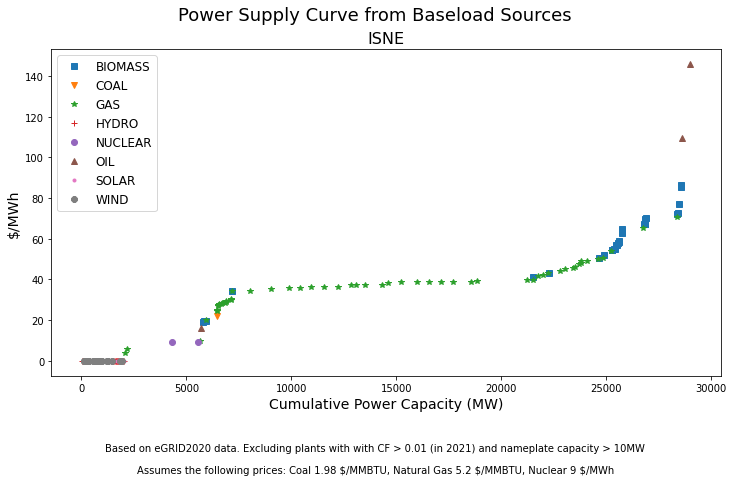

In [17]:
# 3. Create the supply curve using a scatter plot

# To distinguish the plants by type of fuel we will use different markers
groups = question_1c.groupby("PLFUELCT")
list_markers = ['s','v','*','+','o','^','.','8']

plt.figure(figsize=(12,6))

#loop to plot each group of plants by type of fuel (different colors and markers)
counter = 0
for name, group in groups:
  plt.plot(group["CUM_CAP"], group["MARG_COST"], marker=list_markers[counter], 
             linestyle="", label=name)
  counter = counter + 1

#Add titles and label axes
plt.suptitle('Power Supply Curve from Baseload Sources',
          fontsize=18)
plt.title('ISNE', fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW)", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)

#Make sure to add a caption that makes this plot a stand-alone piece of information
txt="Based on eGRID2020 data. Excluding plants with with CF > 0.01 (in 2021) and nameplate capacity > 10MW"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
txt2='Assumes the following prices: Coal {} $/MMBTU, Natural Gas {} $/MMBTU, Nuclear {} $/MWh'.format(AVG_PRICE_COAL, AVG_PRICE_NG, MARG_COST_NUCLEAR,)
plt.figtext(0.5, -0.1, txt2, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

### d.	What would happen if natural gas demand to heat homes disrupted the supply of fuel to power generators? Repeat b but this time assume that only half of the natural gas capacity is available due to fuel supply disruptions. What is the highest electricity demand that can be served under these conditions?

In [18]:
question_1d = question_1.copy()

#Plant primary fuel category for baseload
question_1d = question_1c.loc[(question_1d.PLFUELCT == 'COAL') | 
                              (question_1d.PLFUELCT == 'GAS') | 
                              (question_1d.PLFUELCT == 'HYDRO') | 
                              (question_1d.PLFUELCT == 'NUCLEAR') |
                              (question_1d.PLFUELCT == 'BIOMASS') |
                              (question_1d.PLFUELCT == 'OIL') |
                              (question_1d.PLFUELCT == 'SOLAR') |
                              (question_1d.PLFUELCT == 'WIND')]

#Plant capacity factor above 1%.
question_1d = question_1d.loc[question_1d.CAPFAC > 0.01]

#Plant nameplate capacity (MW) above 10 MW
question_1d = question_1d.loc[question_1d.NAMEPCAP > 10]

question_1d.loc[question_1d.PLFUELCT=='SOLAR','NAMEPCAP'] = question_1d.NAMEPCAP*question_1d.CAPFAC
question_1d.loc[question_1d.PLFUELCT=='WIND','NAMEPCAP'] = question_1d.NAMEPCAP*question_1d.CAPFAC
question_1d.loc[question_1d.PLFUELCT=='GAS','NAMEPCAP'] = question_1d.NAMEPCAP*0.5 #only half capacity

#Estimate the marginal costs of each plant
#1. Calculate HEAT RATE
#  HEAT RATE (MMBTU/MWH) = ANNUAL HEAT INPUT (MMBTU)/ANNUAL GENERATION (MWH)
question_1d['HEAT_RATE'] = question_1d.PLHTIAN / question_1d.PLNGENAN

#2. Calculate marginal cost in $/MWh
#MARGINAL COST [$/MWH] = HEAT RATE (MMBTU/MWH) * COST OF FUEL [$/MMBTU]

# NG and Coal Prices from: 
# https://www.eia.gov/electricity/annual/html/epa_07_01.html
MARG_COST_NUCLEAR = 9 #$/MWh
AVG_PRICE_NG = 5.20 #$/MMBtu 
AVG_PRICE_COAL = 1.98 #$/MMBtu
AVG_PRICE_OIL = 10.88 #$/MMBtu
AVG_PRICE_BIOMASS = 3.46 #$/MMBtu
#Solar and wind price = 0

# Create new attribute to store the marginal cost
# Initially all the values are zero
question_1d['MARG_COST'] = 0
# Replace the marginal costs of nuclear plants by the given cost
question_1d.loc[question_1d.PLFUELCT=='NUCLEAR','MARG_COST'] = MARG_COST_NUCLEAR
# Replace the marginal costs of coal & NG plants by: heat rate * fuel cost
question_1d.loc[question_1d.PLFUELCT=='COAL','MARG_COST'] = question_1d.HEAT_RATE*AVG_PRICE_COAL
question_1d.loc[question_1d.PLFUELCT=='GAS','MARG_COST'] = question_1d.HEAT_RATE*AVG_PRICE_NG
question_1d.loc[question_1d.PLFUELCT=='OIL','MARG_COST'] = question_1d.HEAT_RATE*AVG_PRICE_OIL
question_1d.loc[question_1d.PLFUELCT=='BIOMASS','MARG_COST'] = question_1d.HEAT_RATE*AVG_PRICE_BIOMASS

#Show the first 5 values
question_1d.head(n=5)

,PNAME,BACODE,PLFUELCT,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,YEAR,HEAT_RATE,MARG_COST,CUM_CAP
4961,Hiram,ISNE,HYDRO,0.42723,10.500000,NaN,39297.000,2021,NaN,0.0,10.500000
4959,Harris Hydro,ISNE,HYDRO,0.18874,76.400000,NaN,126316.999,2021,NaN,0.0,86.900000
5021,Stetson Wind I,ISNE,WIND,0.23353,3.108567,NaN,116606.000,2021,NaN,0.0,100.211210
5016,Skelton,ISNE,HYDRO,0.63854,16.800000,NaN,93973.000,2021,NaN,0.0,123.600010
5012,Saddleback Ridge Wind Farm,ISNE,WIND,0.33386,3.812017,NaN,100022.000,2021,NaN,0.0,145.014606


In [19]:
#Build a Supply Curve of Electricity
#1. Sort plants by merit order. This is from the cheapest to the most expensive
question_1d.sort_values("MARG_COST", inplace=True)
question_1d.head(n=5)

,PNAME,BACODE,PLFUELCT,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,YEAR,HEAT_RATE,MARG_COST,CUM_CAP
4961,Hiram,ISNE,HYDRO,0.42723,10.500000,NaN,39297.000,2021,NaN,0.0,10.500000
5036,Williams Hydro,ISNE,HYDRO,0.53709,13.000000,NaN,61164.000,2021,NaN,0.0,892.322976
4958,Hancock Wind Plant,ISNE,WIND,0.27211,3.776236,NaN,121569.000,2021,NaN,0.0,910.007706
10950,Wilder,ISNE,HYDRO,0.39348,35.600000,NaN,122710.000,2021,NaN,0.0,945.607706
4929,Anson Abenaki Hydros,ISNE,HYDRO,0.35949,29.000000,NaN,91325.998,2021,NaN,0.0,974.607706


In [21]:
# 2. Create a column with the cummulative capacity [MW] offered at that MARG_COST
# this info is needed to draw the supply curve
question_1d['CUM_CAP'] = question_1d.NAMEPCAP.cumsum(skipna=False)
question_1d.tail(n=5)
#The highest demand that can be served under this condition is 18021.11 MW.

,PNAME,BACODE,PLFUELCT,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,YEAR,HEAT_RATE,MARG_COST,CUM_CAP
4993,Penobscot Energy Recovery,ISNE,BIOMASS,0.20285,25.3,1121812.140,44958.0,2021,24.952448,86.335469,17566.90888
2304,Backus Microgrid Project,ISNE,OIL,0.01045,10.4,9591.000,952.0,2021,10.074580,109.611429,17577.30888
7298,Newington,ISNE,OIL,0.01614,414.0,784320.612,58527.0,2021,13.401005,145.802933,17991.30888
2314,"Bridgeport Fuel Cell, LLC",ISNE,GAS,0.70677,8.3,NaN,102775.0,2021,NaN,NaN,17999.60888
10922,Ryegate Associates,ISNE,BIOMASS,0.85775,21.5,NaN,161549.0,2021,NaN,NaN,18021.10888


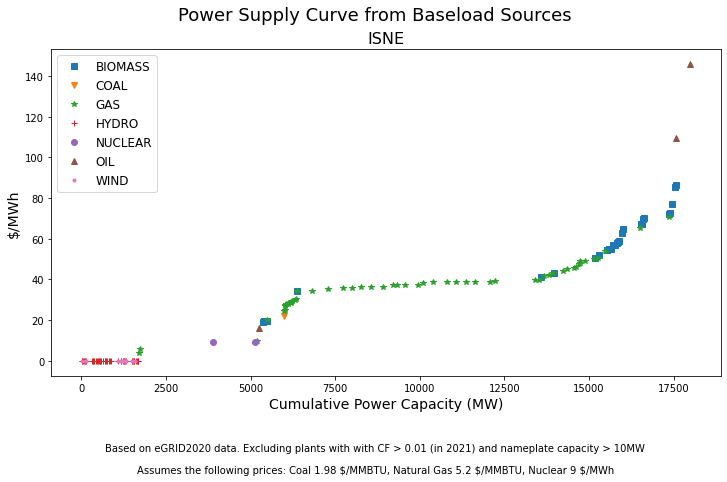

In [22]:
# 3. Create the supply curve using a scatter plot

# To distinguish the plants by type of fuel we will use different markers
groups = question_1d.groupby("PLFUELCT")
list_markers = ['s','v','*','+','o','^','.','8']

plt.figure(figsize=(12,6))

#loop to plot each group of plants by type of fuel (different colors and markers)
counter = 0
for name, group in groups:
  plt.plot(group["CUM_CAP"], group["MARG_COST"], marker=list_markers[counter], 
             linestyle="", label=name)
  counter = counter + 1

#Add titles and label axes
plt.suptitle('Power Supply Curve from Baseload Sources',
          fontsize=18)
plt.title('ISNE', fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW)", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)

#Make sure to add a caption that makes this plot a stand-alone piece of information
txt="Based on eGRID2020 data. Excluding plants with with CF > 0.01 (in 2021) and nameplate capacity > 10MW"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
txt2='Assumes the following prices: Coal {} $/MMBTU, Natural Gas {} $/MMBTU, Nuclear {} $/MWh'.format(AVG_PRICE_COAL, AVG_PRICE_NG, MARG_COST_NUCLEAR,)
plt.figtext(0.5, -0.1, txt2, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()

### e.	Repeat d. but consider the situation when supply from nuclear power plants is reduced to 70% of the nameplate capacity. What is the highest electricity demand that can be served under these conditions?

In [23]:
question_1e = question_1.copy()

#Plant primary fuel category for baseload
question_1e = question_1c.loc[(question_1e.PLFUELCT == 'COAL') | 
                              (question_1e.PLFUELCT == 'GAS') | 
                              (question_1e.PLFUELCT == 'HYDRO') | 
                              (question_1e.PLFUELCT == 'NUCLEAR') |
                              (question_1e.PLFUELCT == 'BIOMASS') |
                              (question_1e.PLFUELCT == 'OIL') |
                              (question_1e.PLFUELCT == 'SOLAR') |
                              (question_1e.PLFUELCT == 'WIND')]

#Plant capacity factor above 1%.
question_1e = question_1e.loc[question_1e.CAPFAC > 0.01]

#Plant nameplate capacity (MW) above 10 MW
question_1e = question_1e.loc[question_1e.NAMEPCAP > 10]

question_1e.loc[question_1e.PLFUELCT=='SOLAR','NAMEPCAP'] = question_1e.NAMEPCAP*question_1e.CAPFAC
question_1e.loc[question_1e.PLFUELCT=='WIND','NAMEPCAP'] = question_1e.NAMEPCAP*question_1e.CAPFAC
question_1e.loc[question_1e.PLFUELCT=='GAS','NAMEPCAP'] = question_1e.NAMEPCAP*0.5 #only half capacity
question_1e.loc[question_1e.PLFUELCT=='NUCLEAR','NAMEPCAP'] = question_1e.NAMEPCAP*0.7 #only 70% of capacity

#Estimate the marginal costs of each plant
#1. Calculate HEAT RATE
#  HEAT RATE (MMBTU/MWH) = ANNUAL HEAT INPUT (MMBTU)/ANNUAL GENERATION (MWH)
question_1e['HEAT_RATE'] = question_1e.PLHTIAN / question_1e.PLNGENAN

#2. Calculate marginal cost in $/MWh
#MARGINAL COST [$/MWH] = HEAT RATE (MMBTU/MWH) * COST OF FUEL [$/MMBTU]

# NG and Coal Prices from: 
# https://www.eia.gov/electricity/annual/html/epa_07_01.html
MARG_COST_NUCLEAR = 9 #$/MWh
AVG_PRICE_NG = 5.20 #$/MMBtu 
AVG_PRICE_COAL = 1.98 #$/MMBtu
AVG_PRICE_OIL = 10.88 #$/MMBtu
AVG_PRICE_BIOMASS = 3.46 #$/MMBtu
#Solar and wind price = 0

# Create new attribute to store the marginal cost
# Initially all the values are zero
question_1e['MARG_COST'] = 0
# Replace the marginal costs of nuclear plants by the given cost
question_1e.loc[question_1e.PLFUELCT=='NUCLEAR','MARG_COST'] = MARG_COST_NUCLEAR
# Replace the marginal costs of coal & NG plants by: heat rate * fuel cost
question_1e.loc[question_1e.PLFUELCT=='COAL','MARG_COST'] = question_1e.HEAT_RATE*AVG_PRICE_COAL
question_1e.loc[question_1e.PLFUELCT=='GAS','MARG_COST'] = question_1e.HEAT_RATE*AVG_PRICE_NG
question_1e.loc[question_1e.PLFUELCT=='OIL','MARG_COST'] = question_1e.HEAT_RATE*AVG_PRICE_OIL
question_1e.loc[question_1e.PLFUELCT=='BIOMASS','MARG_COST'] = question_1e.HEAT_RATE*AVG_PRICE_BIOMASS

#Show the first 5 values
question_1e.head(n=5)

,PNAME,BACODE,PLFUELCT,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,YEAR,HEAT_RATE,MARG_COST,CUM_CAP
4961,Hiram,ISNE,HYDRO,0.42723,10.500000,NaN,39297.000,2021,NaN,0.0,10.500000
4959,Harris Hydro,ISNE,HYDRO,0.18874,76.400000,NaN,126316.999,2021,NaN,0.0,86.900000
5021,Stetson Wind I,ISNE,WIND,0.23353,3.108567,NaN,116606.000,2021,NaN,0.0,100.211210
5016,Skelton,ISNE,HYDRO,0.63854,16.800000,NaN,93973.000,2021,NaN,0.0,123.600010
5012,Saddleback Ridge Wind Farm,ISNE,WIND,0.33386,3.812017,NaN,100022.000,2021,NaN,0.0,145.014606


In [24]:
#Build a Supply Curve of Electricity
#1. Sort plants by merit order. This is from the cheapest to the most expensive
question_1e.sort_values("MARG_COST", inplace=True)
question_1e.head(n=5)

,PNAME,BACODE,PLFUELCT,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,YEAR,HEAT_RATE,MARG_COST,CUM_CAP
4961,Hiram,ISNE,HYDRO,0.42723,10.500000,NaN,39297.000,2021,NaN,0.0,10.500000
5036,Williams Hydro,ISNE,HYDRO,0.53709,13.000000,NaN,61164.000,2021,NaN,0.0,892.322976
4958,Hancock Wind Plant,ISNE,WIND,0.27211,3.776236,NaN,121569.000,2021,NaN,0.0,910.007706
10950,Wilder,ISNE,HYDRO,0.39348,35.600000,NaN,122710.000,2021,NaN,0.0,945.607706
4929,Anson Abenaki Hydros,ISNE,HYDRO,0.35949,29.000000,NaN,91325.998,2021,NaN,0.0,974.607706


In [26]:
# 2. Create a column with the cummulative capacity [MW] offered at that MARG_COST
# this info is needed to draw the supply curve
question_1e['CUM_CAP'] = question_1e.NAMEPCAP.cumsum(skipna=False)
question_1e.tail(n=5)
# The highest demand that can be served under this condition 16999.64 MW

,PNAME,BACODE,PLFUELCT,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,YEAR,HEAT_RATE,MARG_COST,CUM_CAP
4993,Penobscot Energy Recovery,ISNE,BIOMASS,0.20285,25.3,1121812.140,44958.0,2021,24.952448,86.335469,16545.43888
2304,Backus Microgrid Project,ISNE,OIL,0.01045,10.4,9591.000,952.0,2021,10.074580,109.611429,16555.83888
7298,Newington,ISNE,OIL,0.01614,414.0,784320.612,58527.0,2021,13.401005,145.802933,16969.83888
2314,"Bridgeport Fuel Cell, LLC",ISNE,GAS,0.70677,8.3,NaN,102775.0,2021,NaN,NaN,16978.13888
10922,Ryegate Associates,ISNE,BIOMASS,0.85775,21.5,NaN,161549.0,2021,NaN,NaN,16999.63888


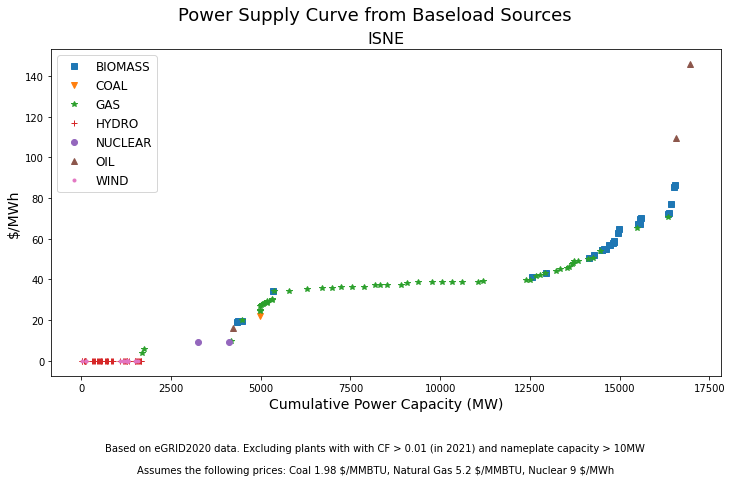

In [27]:
# 3. Create the supply curve using a scatter plot

# To distinguish the plants by type of fuel we will use different markers
groups = question_1e.groupby("PLFUELCT")
list_markers = ['s','v','*','+','o','^','.','8']

plt.figure(figsize=(12,6))

#loop to plot each group of plants by type of fuel (different colors and markers)
counter = 0
for name, group in groups:
  plt.plot(group["CUM_CAP"], group["MARG_COST"], marker=list_markers[counter], 
             linestyle="", label=name)
  counter = counter + 1

#Add titles and label axes
plt.suptitle('Power Supply Curve from Baseload Sources',
          fontsize=18)
plt.title('ISNE', fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW)", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)

#Make sure to add a caption that makes this plot a stand-alone piece of information
txt="Based on eGRID2020 data. Excluding plants with with CF > 0.01 (in 2021) and nameplate capacity > 10MW"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
txt2='Assumes the following prices: Coal {} $/MMBTU, Natural Gas {} $/MMBTU, Nuclear {} $/MWh'.format(AVG_PRICE_COAL, AVG_PRICE_NG, MARG_COST_NUCLEAR,)
plt.figtext(0.5, -0.1, txt2, wrap=True, horizontalalignment='center', fontsize=10)

plt.show()